In [29]:
import pickle
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt

from insect_rl.algorithms.evaluation import IAVIEvaluation
from insect_rl.simulation import Simulation
from insect_rl.mdp.utils import grid_math
from insect_rl.plot import plot_grids

from iql.algorithms.iavi import inverse_action_value_iteration
import iql.plot_experiments as plt_exp

In [30]:
if "snakemake" not in locals().keys():
    experiment="Wystrach2020"
    condition="trap"
    wind=0.0
    inputs = [f"../../../irl/{experiment}/{condition}/{wind}/envc.pickle", 
              f"../../../irl/{experiment}/{condition}/transition_probs_wind={wind}.npy",
              f"../../../irl/{experiment}/{condition}/{wind}/results/action_probs.npy",
              f"../../../irl/{experiment}/{condition}/{wind}/results/ground_r.npy",
              f"../../../irl/{experiment}/{condition}/{wind}/results/q.npy",
              f"../../../irl/{experiment}/{condition}/{wind}/results/r.npy",
              f"../../../irl/{experiment}/{condition}/{wind}/results/boltz.npy"
             ]
else:
    inputs = snakemake.input

In [32]:
with open(inputs[0], 'rb') as envc_file:
    envc = pickle.load(envc_file)


transition_probs = np.load(inputs[1])
action_probs = np.load(inputs[2])
ground_r = np.load(inputs[3])

q = np.load(inputs[4])
r = np.load(inputs[5])
boltz = np.load(inputs[6])
#np.save("rtrap.npy")

In [33]:
nS = envc.width * envc.height
nA = action_probs.shape[1]
V = np.zeros(nS)
for s in range(nS):
    for a in range(nA):
        V[s] += boltz[s][a] * q[s][a]
R = np.zeros(nS)
for s in range(nS):
    for a in range(nA):
        R[s] += boltz[s][a] * r[s][a]

def max_direction(state):
    if all([math.isclose(a,state[0]) for a in state]):
        return np.array((0.0,0.0))
    #print(state)
    max_dir = np.array(INTERCARDINALS[np.argmax(state)])
    return (max_dir/np.linalg.norm(max_dir)) * np.max(state)

np.save("Rtrap.npy", R)

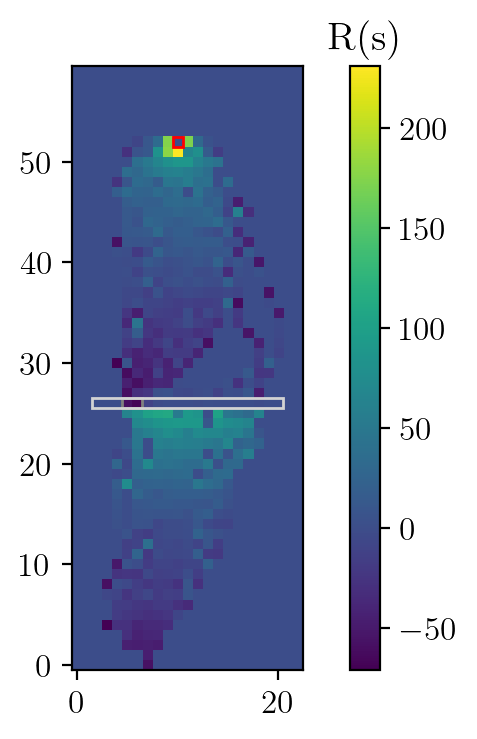

In [34]:
import matplotlib
matplotlib.rcParams["figure.dpi"] = 200

plt.imshow(V.reshape(envc.height, envc.width))
goal = (10.0 -.5,52.0-.5)
t_exit = envc.trap_exits[0][0]
patches = [
Rectangle(goal, width=1, height=1, edgecolor='red', fill=False),
Rectangle((t_exit[0]-.5,t_exit[1]-.5), width=2.0, height=1, edgecolor='gray', fill=False)
#Rectangle(envc.start + , width=1, height=1, color='green')   
]
#patches.extend([Rectangle((trap[0]-.5,trap[1]-.5), width=1, height=1, color='lightgray') for trap in envc.traps])
patches.extend([Rectangle((envc.traps[0][0]-.5,envc.traps[0][1]-.5), width=19, height=1, edgecolor='lightgray', fill=False)])


for patch in patches:
    plt.gca().add_patch(patch, )
plt.gca().invert_yaxis()
clb = plt.colorbar()
clb.ax.set_title('V(s)')
#plt.show()#plt.savefig(snakemake.output[2])
plt.savefig("/home/paulina/Desktop/v_trap.png", bbox_inches="tight")
plt.clf()

plt.imshow(R.reshape(envc.height, envc.width))
goal = (10.0 -.5,52.0-.5)
t_exit = envc.trap_exits[0][0]
patches = [
Rectangle(goal, width=1, height=1, edgecolor='red', fill=False),
Rectangle((t_exit[0]-.5,t_exit[1]-.5), width=2.0, height=1, edgecolor='gray', fill=False)
#Rectangle(envc.start + , width=1, height=1, color='green')   
]
#patches.extend([Rectangle((trap[0]-.5,trap[1]-.5), width=1, height=1, color='lightgray') for trap in envc.traps])
patches.extend([Rectangle((envc.traps[0][0]-.5,envc.traps[0][1]-.5), width=19, height=1, edgecolor='lightgray', fill=False)])


for patch in patches:
    plt.gca().add_patch(patch, )

plt.gca().invert_yaxis()
clb = plt.colorbar()
clb.ax.set_title('R(s)')

#plt.show()#plt.savefig(snakemake.output[3])
plt.savefig("/home/paulina/Desktop/justr_trap.png", bbox_inches="tight")



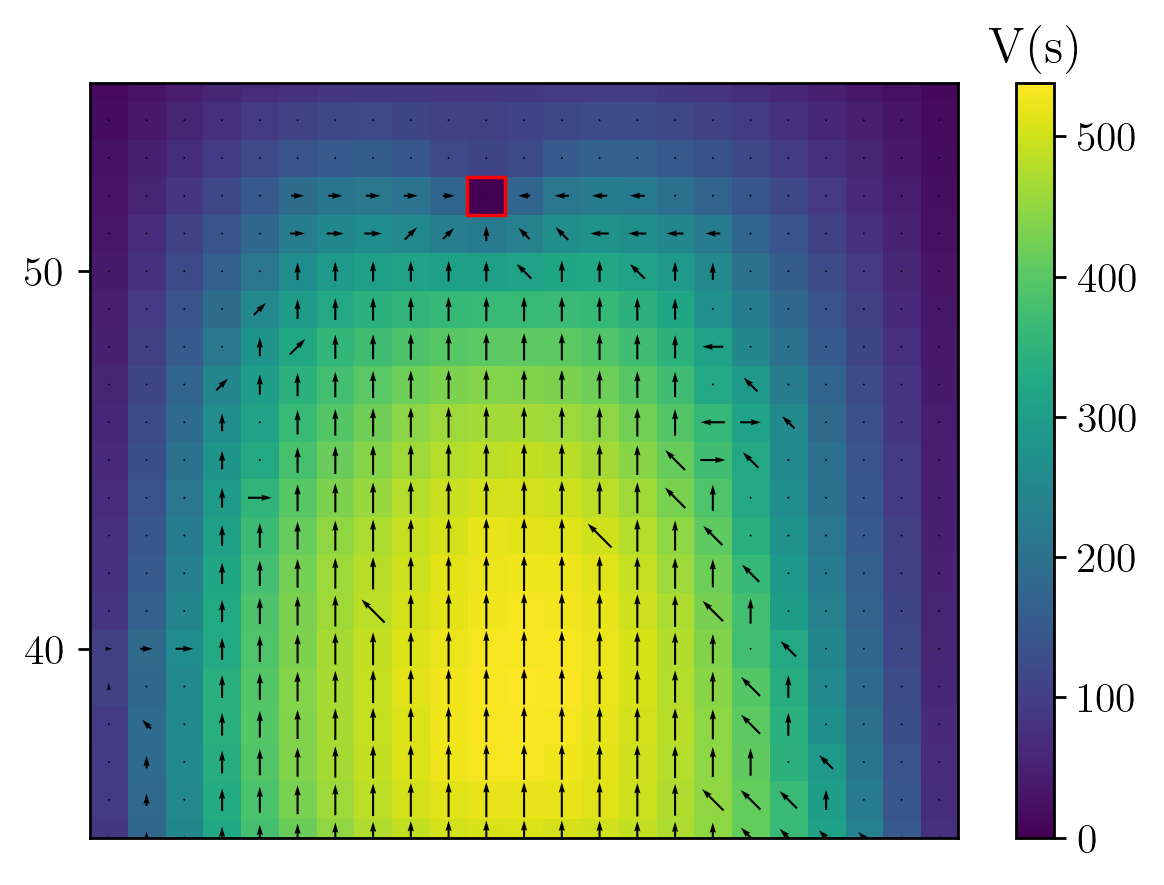

In [22]:
from matplotlib.patches import Rectangle
q_grid = q.reshape((60,23,8))
q_grid[0][0]
INTERCARDINALS = ((1, 0), (0, 1), (-1, 0), (0, -1), (-1,-1), (-1,1), (1,-1), (1,1))
import matplotlib
import math
matplotlib.rcParams["figure.dpi"] = 250


qs = np.apply_along_axis(max_direction, 1, q)
qs.shape
qs_resh = np.reshape(qs, (60,23,2))
U_quiv = qs_resh[:,:,0]
V_quiv = qs_resh[:,:,1]

fig, ax = plt.subplots()

goal = (10.0 -.5,52.0-.5)
t_exit = envc.trap_exits[0][0]
patches = [
Rectangle(goal, width=1, height=1, edgecolor='red', fill=False),
Rectangle((t_exit[0]-.5,t_exit[1]-.5), width=2.0, height=1, edgecolor='gray', fill=False)
#Rectangle(envc.start + , width=1, height=1, color='green')   
]
#patches.extend([Rectangle((trap[0]-.5,trap[1]-.5), width=1, height=1, color='lightgray') for trap in envc.traps])
patches.extend([Rectangle((envc.traps[0][0]-.5,envc.traps[0][1]-.5), width=19, height=1, edgecolor='lightgray', fill=False)])


for patch in patches:
    plt.gca().add_patch(patch, )


#plt.colorbar()

quiv = ax.quiver(U_quiv, V_quiv, pivot='mid')
plt.imshow(V.reshape((60,23)))
clb = plt.colorbar()

ax.set_aspect('equal')
plt.gca().invert_yaxis()
clb.ax.set_title('V(s)')
plt.gca().set_yticks([40,50])
plt.gca().set_xticks([])

plt.gca().set_ylim((35,55))


plt.savefig("/home/paulina/Desktop/qv_trapgoal.png", bbox_inches="tight")


plt.show()

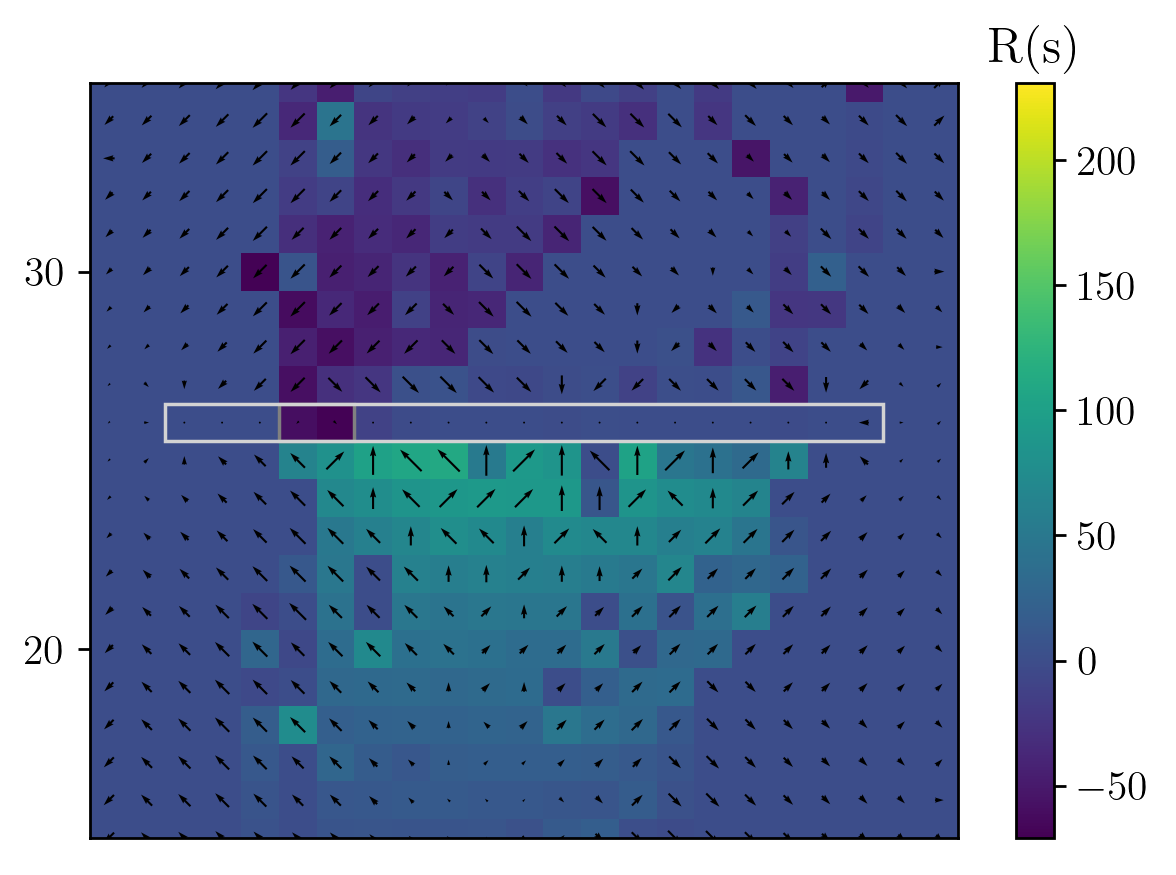

In [35]:
INTERCARDINALS = ((1, 0), (0, 1), (-1, 0), (0, -1), (-1,-1), (-1,1), (1,-1), (1,1))
import matplotlib
import math
from matplotlib.patches import Circle, Rectangle

matplotlib.rcParams["figure.dpi"] = 250


rs = np.apply_along_axis(max_direction, 1, r)
rs_resh = np.reshape(rs, (60,23,2))
U_quiv = rs_resh[:,:,0]
V_quiv = rs_resh[:,:,1]

fig, ax = plt.subplots()

goal = (10.0 -.5,52.0-.5)
t_exit = envc.trap_exits[0][0]

patches = [
Rectangle(goal, width=1, height=1, edgecolor='red', fill=False),
Rectangle((t_exit[0]-.5,t_exit[1]-.5), width=2.0, height=1, edgecolor='gray', fill=False)
#Rectangle(envc.start + , width=1, height=1, color='green')    
]
#patches.extend([Rectangle((trap[0]-.5,trap[1]-.5), width=1, height=1, color='lightgray') for trap in envc.traps])
patches.extend([Rectangle((envc.traps[0][0]-.5,envc.traps[0][1]-.5), width=19, height=1, edgecolor='lightgray', fill=False)])


for patch in patches:
    plt.gca().add_patch(patch, )


quiv = ax.quiver(U_quiv, V_quiv, pivot='mid')
ax.set_aspect('equal')

plt.imshow(R.reshape((60,23)))
clb = plt.colorbar()
clb.ax.set_title('R(s)')

plt.gca().invert_yaxis()
plt.gca().set_yticks([20,30])
plt.gca().set_xticks([])

plt.gca().set_ylim((15,35))
#plt.show()
plt.savefig("/home/paulina/Desktop/r_trapsmall.png", bbox_inches="tight")


In [88]:
print(r[7])
print(boltz[7])
print(R[7])
print(np.max(r[7]))


[-1.44334721e-02 -5.76315016e+01 -2.32662525e-02  5.65386758e+01
  5.65386758e+01 -5.64868245e+01  5.65386758e+01 -5.54600017e+01]
[9.99992e-07 9.99993e-01 9.99992e-07 9.99992e-07 9.99992e-07 9.99992e-07
 9.99992e-07 9.99992e-07]
-57.63104053010765
56.538675836552116


In [9]:
envc.goals
def centroid(data):
    x, y = zip(*data)
    l = len(x)
    return int(round(sum(x) / l)), int(round(sum(y) / l))
centroid(envc.goals)


(10, 52)

In [6]:
#exit:(17,30), (17,31), 18
# ((1, 0), (0, 1), (-1, 0), (0, -1), (-1,-1), (-1,1), (1,-1), (1,1))
p1 = grid_math.point_to_int((18,30), envc.width)
p2 = grid_math.point_to_int((19,30), envc.width)

In [7]:
transition_probs[p1][0][p2]

1.0

In [10]:
np.allclose(boltz, action_probs, rtol=1.e-5, atol=1.e-6)

True

NameError: name 'snakemake' is not defined

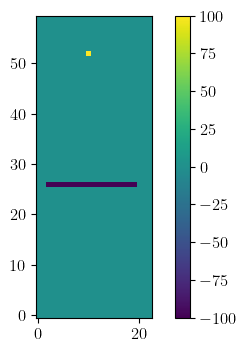

In [71]:
matplotlib.rcParams["figure.dpi"] = 100

plt.imshow(ground_r.reshape(envc.height, envc.width))
plt.gca().invert_yaxis()
plt.colorbar()
plt.savefig(snakemake.output[0])

In [15]:
%%capture

v_iavi9 = plt_exp.policy_eval(boltz, ground_r, transition_probs, nS, nA, discount_factor=0.9, theta=0.001)
v_iavi99 = plt_exp.policy_eval(boltz, ground_r, transition_probs, nS, nA, discount_factor=0.99, theta=0.001)

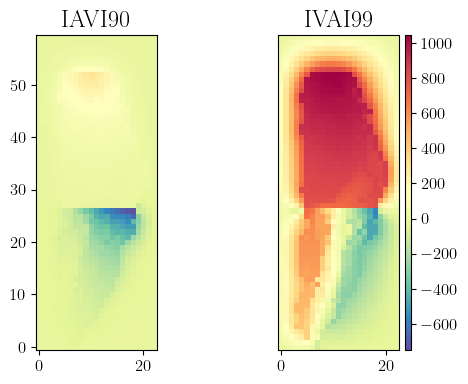

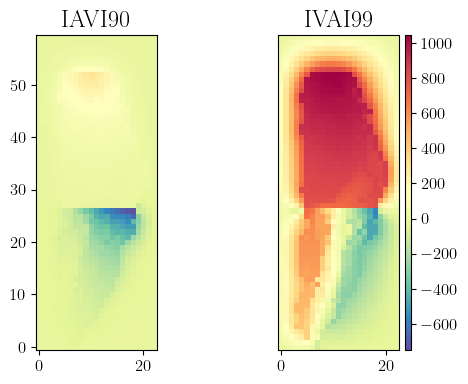

In [16]:
plot_grids(envc.width, envc.height, envc.start, IAVI90=v_iavi9, IVAI99=v_iavi99)
#plt.savefig(snakemake.output[1])

In [89]:
%%capture
v_iaviR = plt_exp.policy_eval(boltz, R, transition_probs, nS, nA, discount_factor=0.99, theta=0.001)

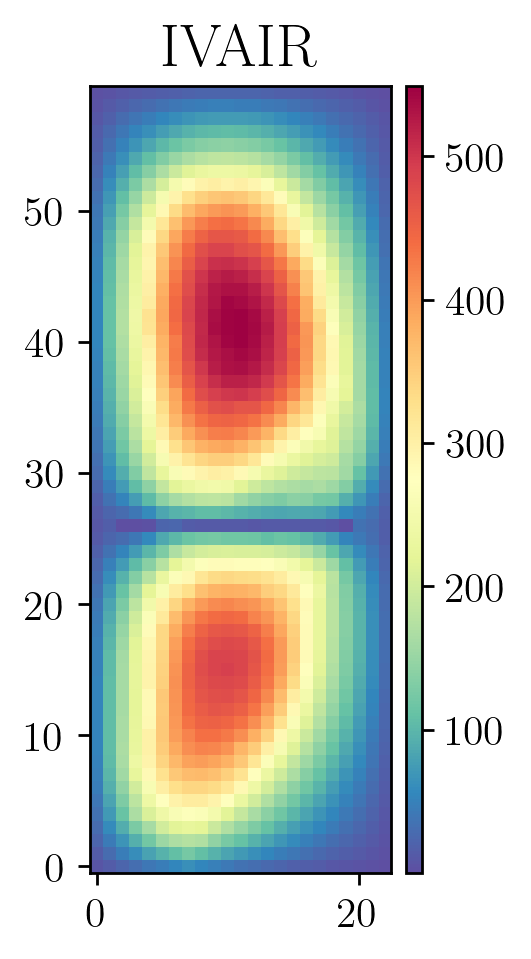

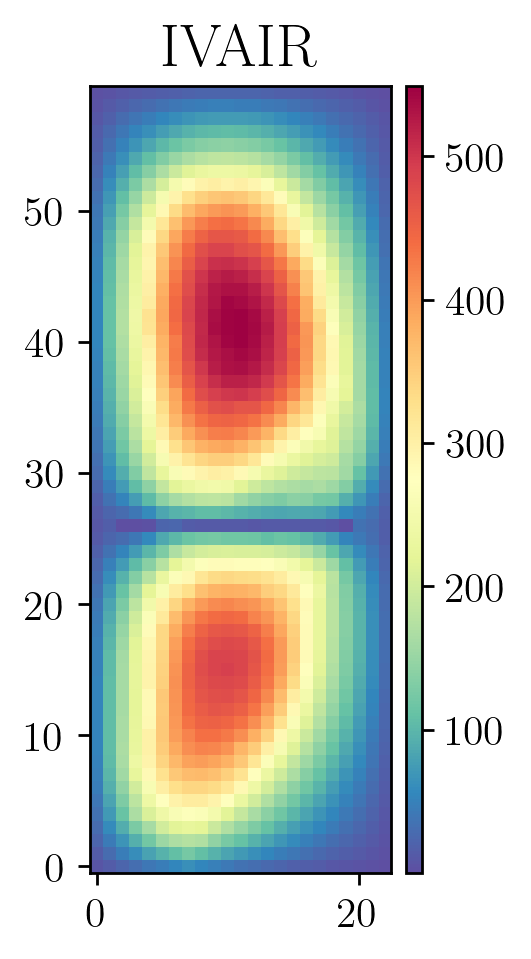

In [90]:
plot_grids(envc.width, envc.height, envc.start, IVAIR=v_iaviR)
#plt.savefig(snakemake.output[4])

In [17]:
%%capture
#p_start_state = (np.bincount(trajectories[:, 0, 0], minlength=env.n_states)/trajectories.shape[0])



# V(s) <- sum[Au: T(s,a,u) * p(s,a) * (r(s) + discount * V(u)) ]

# results of boltzman policy inferred via iavi and the ground truth reward
#v_iavi = plt_exp.policy_eval(boltz, ground_r, transition_probs, nS, nA, discount_factor=0.99, theta=0.001)

# results of the action probabilities taken from the trajectories
v_true = plt_exp.policy_eval(action_probs, ground_r, transition_probs, nS, nA, discount_factor=0.99, theta=0.001)

# found via value iteration
b = plt_exp.find_policy(nS, nA, transition_probs, ground_r, discount=0.99, threshold=1e-2)
v_valueit = plt_exp.policy_eval(b, ground_r, transition_probs, nS, nA, discount_factor=0.99, theta=0.001)


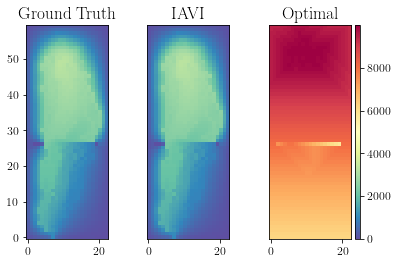

In [18]:
fig = plot_grids(envc.width, envc.height, envc.start, Ground_Truth=v_true, IAVI=v_iavi99, Optimal=v_valueit)
#w = snakemake.wildcards
#label = "condition: " + w['condition'] + ", wind: " + w['wind'] + ", reward: " + "100" + ", trap cost: " + "-100"
plt.subplots_adjust(top=0.85)
#fig.suptitle(label, fontsize=16)
#plt.savefig(snakemake.output[5])